In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

In [2]:
# X-y split.
# Normalize (numerical).
# One Hot/Label Encoding (categorical).

In [3]:
df_c = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Lab/Data_Tableau/Data_Marketing_Customer_Analysis_Round2_cleaned.csv")

In [4]:
df_c = df_c.dropna()

In [5]:
X = df_c.drop(columns ="Total Claim Amount")
Y = df_c["Total Claim Amount"]
#X-Y Split

In [6]:
#split X to numeric and categorical
X_cat= X.select_dtypes("object")
X_cat
X_num = X._get_numeric_data()
X_num.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True)

#switch this two columns into the categoricals df
X_cat['Number of Open Complaints'] = df_c['Number of Open Complaints']
X_cat['Number of Policies'] = df_c['Number of Policies']

/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_4684/1789399791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['Number of Open Complaints'] = df_c['Number of Open Complaints']
/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_4684/1789399791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['Number of Policies'] = df_c['Number of Policies']


array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Monthly Premium Auto'}>,
        <AxesSubplot:title={'center':'Months Since Last Claim'}>],
       [<AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:>]], dtype=object)

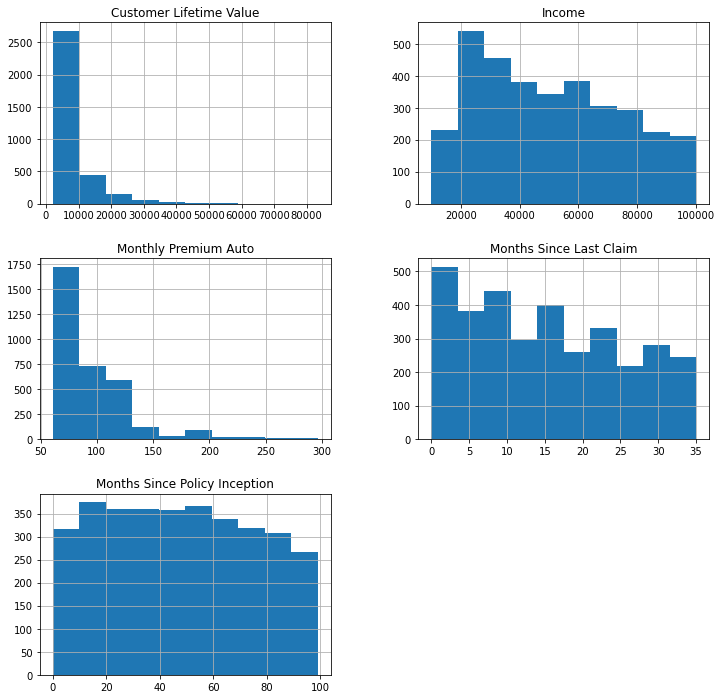

In [7]:
X_num.hist(figsize=(12,12))


In [8]:
#qt = QuantileTransformer(output_distribution="normal")
#Customer_Lifetime_Value_transformed = qt.fit_transform(X_num["Customer Lifetime Value"].to_numpy().reshape(-1,1))
#sns.displot(Customer_Lifetime_Value_transformed)
#replace

## pt = PowerTransformer(method = "box-cox", , standardize=False)
 ##Customer_Lifetime_Value_transformed=pt.fit_transform(X_num["Customer Lifetime Value"].to_numpy().reshape(-1,1))
 ##sns.displot(Customer_Lifetime_Value_transformed)
#replace
#X_num["Customer_Lifetime_Value_transformed"]= Customer_Lifetime_Value_transformed
#X_num.drop(["Customer Lifetime Value"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Income_Transformed = qt.fit_transform(X_num["Income"].to_numpy().reshape(-1,1))
#sns.displot(Income_Transformed)
#replace
#X_num["Income_Transformed"]= Income_Transformed
#X_num.drop(["Income"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Monthly_Premium_Auto_transformed = qt.fit_transform(X_num["Monthly Premium Auto"].to_numpy().reshape(-1,1))
#sns.displot(Monthly_Premium_Auto_transformed)
#replace
#X_num["Monthly_Premium_Auto_transformed"]= Monthly_Premium_Auto_transformed
#X_num.drop(["Monthly Premium Auto"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Months_Since_Last_Claim_transformed = qt.fit_transform(X["Months Since Last Claim"].to_numpy().reshape(-1,1))
#sns.displot(Months_Since_Last_Claim_transformed)
#replace
#X_num["Months_Since_Last_Claim_transformed"]= Months_Since_Last_Claim_transformed
#X_num.drop(["Months Since Last Claim"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Months_Since_Policy_Inception_transformed = qt.fit_transform(X_num["Months Since Policy Inception"].to_numpy().reshape(-1,1))
#sns.displot(Months_Since_Policy_Inception_transformed)
#replace
#X_num["Months_Since_Policy_Inception_transformed"]= Months_Since_Policy_Inception_transformed
#X_num.drop(["Months Since Policy Inception"],axis=1,inplace=True)






In [9]:
X_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,Number of Open Complaints,Number of Policies
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,0.0,2
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,0.0,2
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A,0.0,1
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A,0.0,4
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,MM70762,Arizona,Yes,Basic,Master,1/26/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Sports Car,Medsize,A,0.0,8
10865,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A,2.0,1
10866,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,4.0,1
10869,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,0.0,6


In [10]:

#drop column with customwer IDs

X_cat.drop('Customer', axis=1, inplace=True)

/Users/macbookpro/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
X = pd.concat([X_cat,X_num], axis=1)
X

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,...,Vehicle Class,Vehicle Size,Vehicle Type,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,...,SUV,Medsize,A,0.0,2,14947.92,22139.0,100,34.0,31
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,A,0.0,2,22332.44,49078.0,97,10.0,3
10,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,...,SUV,Large,A,0.0,1,5154.76,82730.0,127,13.0,31
13,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,...,Two-Door Car,Medsize,A,0.0,4,5454.59,66334.0,69,25.0,25
16,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,...,Two-Door Car,Large,A,0.0,6,5326.68,76717.0,66,26.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,Arizona,Yes,Basic,Master,1/26/11,Employed,M,Rural,Single,Personal Auto,...,Sports Car,Medsize,A,0.0,8,9075.77,37722.0,116,8.0,23
10865,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,...,Four-Door Car,Medsize,A,2.0,1,3579.02,28304.0,91,10.0,30
10866,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,A,4.0,1,2771.66,59855.0,74,30.0,82
10869,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,A,0.0,6,5259.44,61146.0,65,7.0,68


In [12]:
X.to_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/Data/df_X_modified.csv", index=False)

In [13]:
Y.to_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/Data/df_Y_modified.csv", index=False)